In [3]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal

Populating the interactive namespace from numpy and matplotlib


In [5]:
#transrate reference metrics
file_ncgr_transrate_nt = "../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv"
file_dib_transrate_nt = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"
ncgr_transrate_nt = pd.read_csv(file_ncgr_transrate_nt, index_col='SampleName')
dib_transrate_nt = pd.read_csv(file_dib_transrate_nt, index_col='SampleName')
file_ncgr_transrate_cds = "../assembly_evaluation_data/transrate_reverse_ncgr.cds_v_trinity2.2.0.csv"
file_dib_transrate_cds = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"
ncgr_transrate_cds = pd.read_csv(file_ncgr_transrate_cds, index_col='SampleName')
dib_transrate_cds = pd.read_csv(file_dib_transrate_cds, index_col='SampleName')

In [6]:
dib_transrate_nt = dib_transrate_nt.drop_duplicates()
ncgr_transrate_nt = ncgr_transrate_nt.drop_duplicates()
dib_transrate_cds = dib_transrate_cds.drop_duplicates()
ncgr_transrate_cds = ncgr_transrate_cds.drop_duplicates()

In [7]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate_nt.index) #special flowers are missing
ncnc=set(ncgr_transrate_nt.index)
len(ddd.intersection(ncnc))

651

In [8]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='gray', color2='blue', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.3)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
    ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='gray', color1='blue', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    ax.set_axis_bgcolor('white')
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.90):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

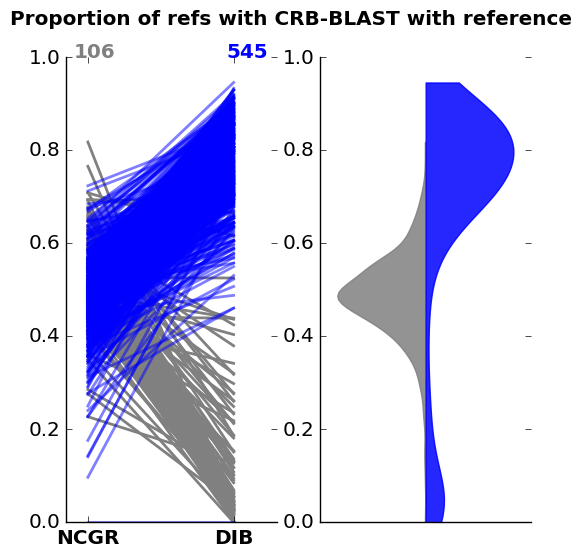

In [18]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'p_refs_with_CRBB', 'Proportion of refs with CRB-BLAST with reference',ymax=1, ypos=1)
savefig('CRB-blast.png')

Figure 2. Using CRB-BLAST, the proportion of DIB contigs matching with an NCGR reference is higher than the proportion of NCGR contigs matching with a DIB reference. Rhere are more similarities between DIB contigs and NCGR than there are when NCGR and DIB contigs. This means that DIB assemblies contain the same information compared to the NCGR assemblies with additional unique information.

In [9]:
ncgr_transrate_nt.columns

Index(['assembly', 'n_seqs', 'smallest', 'largest', 'n_bases', 'mean_len',
       'n_under_200', 'n_over_1k', 'n_over_10k', 'n_with_orf',
       'mean_orf_percent', 'n90', 'n70', 'n50', 'n30', 'n10', 'gc', 'gc_skew',
       'at_skew', 'cpg_ratio', 'bases_n', 'proportion_n',
       'linguistic_complexity', 'CRBB_hits', 'n_contigs_with_CRBB',
       'p_contigs_with_CRBB', 'rbh_per_reference', 'n_refs_with_CRBB',
       'p_refs_with_CRBB', 'cov25', 'p_cov25', 'cov50', 'p_cov50', 'cov75',
       'p_cov75', 'cov85', 'p_cov85', 'cov95', 'p_cov95', 'reference_coverage',
       'score', 'optimal_score', 'cutoff', 'Run'],
      dtype='object')

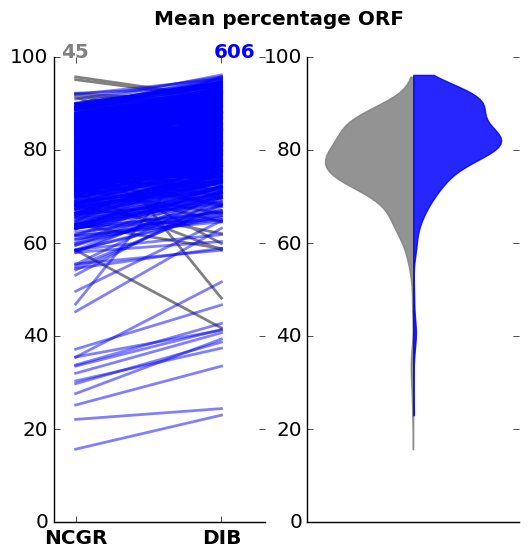

In [10]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'mean_orf_percent', 'Mean percentage ORF',ymax=100, ypos=100)
savefig('mean_ORF.png')

In [17]:
imicrobe_busco = pd.read_csv("../assembly_evaluation_data/busco_scores_imicrobe_eukaryota.csv")

In [18]:
dib_busco = pd.read_csv("../assembly_evaluation_data/busco_scores_MMETSP_eukaryota_trinity2.2.0.csv")

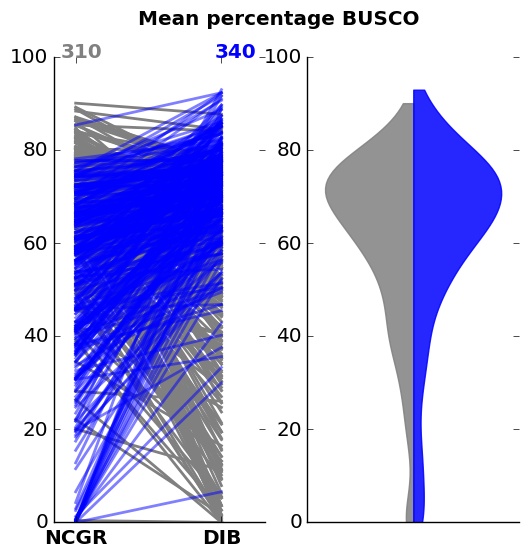

In [20]:
p_refs,fig, ax = create_plots(imicrobe_busco,dib_busco, 'Complete_BUSCO_perc', 'Mean percentage BUSCO',ymax=100, ypos=100)
savefig('mean_BUSCO.png')